In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Import dataset
df = pd.read_csv(r'C:\Users\Ahmed\Desktop\house-prices\train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Inspect the target variable
df['SalePrice'].describe().round(2)

count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Sales Price Distribution')

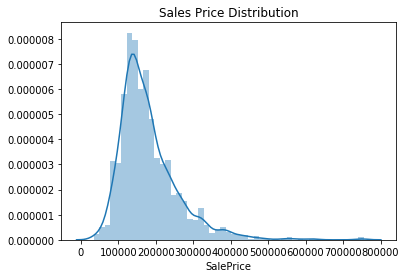

In [4]:
# Inspect the target variable
sns.distplot(df['SalePrice'])
plt.title('Sales Price Distribution')

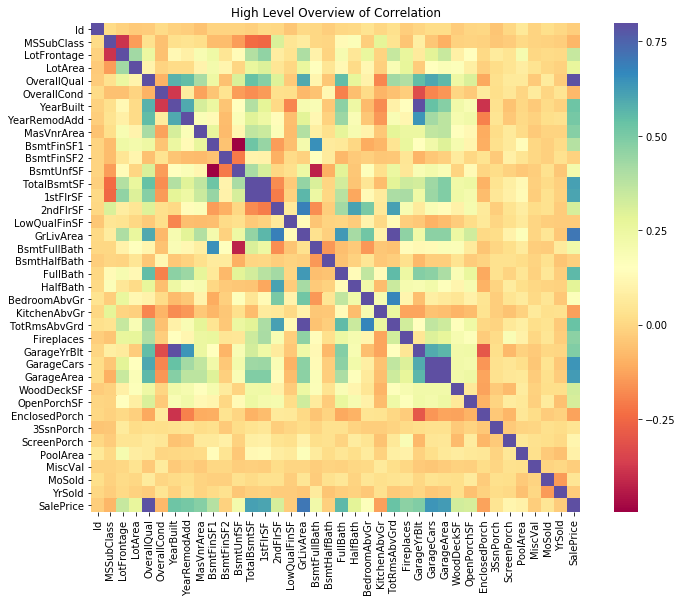

In [5]:
# High level overview of correlated features
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
plt.title('High Level Overview of Correlation')
sns.heatmap(corrmat, vmax=.8, square=True, cmap = 'Spectral')

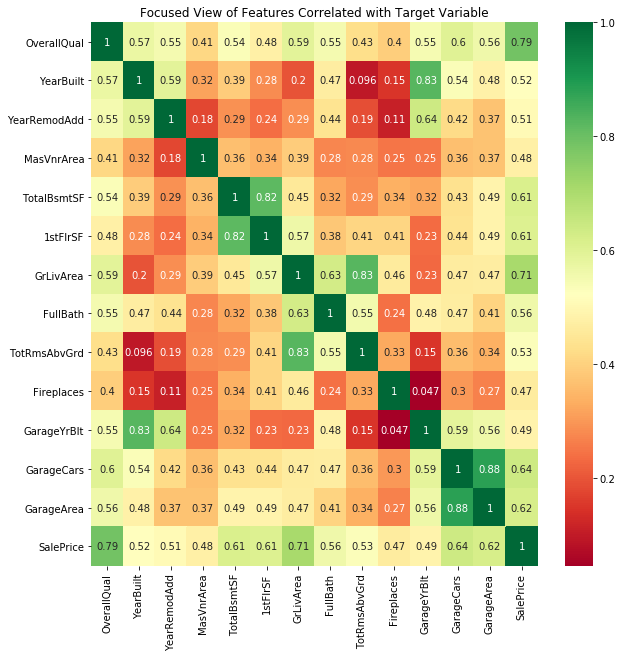

In [6]:
# Focused view of features correlated with target variable
corrmat_focused = corrmat.index[(corrmat['SalePrice'])>0.4]
plt.figure(figsize = (10, 10))
plt.title('Focused View of Features Correlated with Target Variable')
sns.heatmap(df[corrmat_focused].corr(),cmap = 'RdYlGn', annot = True)

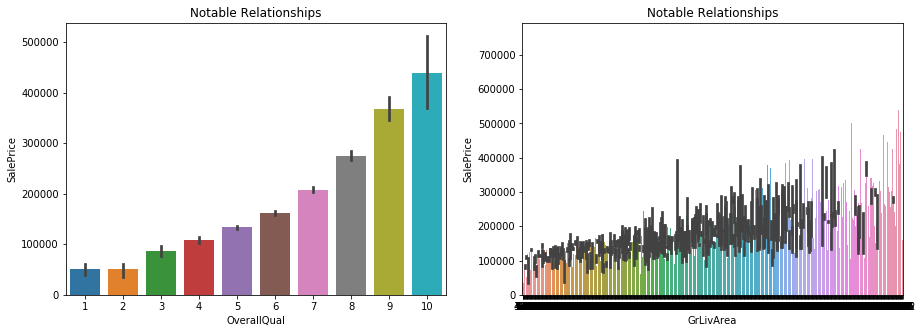

In [7]:
# Overall Quality and General Living Area are the most highly correlated with the Sale Price
# Visualzing the distribution and the probability after transforming the target variable
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Notable Relationships')
sns.barplot(df.OverallQual, df.SalePrice)
plt.subplot(1,2,2)
plt.title('Notable Relationships')
sns.barplot(df.GrLivArea, df.SalePrice)

In [8]:
# Identify null values
nullcount = df.isnull().sum()
nullpercent = df.isnull().sum()/df.isnull().count()
nullpercent = nullpercent.round(3)
nulltype = df.dtypes
null_data = pd.concat(objs = [nullcount, nullpercent, nulltype], axis = 1, keys = ['Null Count', 'Null Percent', 'Null Data Type'])
null_data.sort_values(by = 'Null Percent', ascending = False).head(19)

,Null Count,Null Percent,Null Data Type
PoolQC,1453,0.995,object
MiscFeature,1406,0.963,object
Alley,1369,0.938,object
Fence,1179,0.808,object
FireplaceQu,690,0.473,object
LotFrontage,259,0.177,float64
GarageYrBlt,81,0.055,float64
GarageCond,81,0.055,object
GarageType,81,0.055,object
GarageFinish,81,0.055,object


In [9]:
# Manage missing data
df = df.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageCond', 'BsmtFinType2',
                        'GarageType', 'GarageFinish', 'GarageQual', 'MasVnrType', 'BsmtCond'])
df['FireplaceQu'] = np.where(df['FireplaceQu'].notnull(), 1, 0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('Unf')
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['BsmtExposure'] = df['BsmtExposure'].fillna('Gd')
imputer = SimpleImputer(strategy = 'median')
df['LotFrontage'] = imputer.fit_transform(df[['LotFrontage']])
df['MasVnrArea'] = imputer.fit_transform(df[['MasVnrArea']])

In [10]:
# Convert data types for categorical variables
df['MSSubClass'] = df['MSSubClass'].astype(str)

# Review null values
nullcount = df.isnull().sum()
nullpercent = df.isnull().sum()/df.isnull().count()
nullpercent = nullpercent.round(3)
nulltype = df.dtypes
null_data = pd.concat(objs = [nullcount, nullpercent, nulltype], axis = 1, keys = ['Null Count', 'Null Percent', 'Null Data Type'])
null_data.sort_values(by = 'Null Percent', ascending = False).head(19)

,Null Count,Null Percent,Null Data Type
Id,0,0.0,int64
BsmtHalfBath,0,0.0,int64
TotRmsAbvGrd,0,0.0,int64
KitchenQual,0,0.0,object
KitchenAbvGr,0,0.0,int64
BedroomAbvGr,0,0.0,int64
HalfBath,0,0.0,int64
FullBath,0,0.0,int64
BsmtFullBath,0,0.0,int64
Fireplaces,0,0.0,int64


In [11]:
# Combine similar features
df['Bathrooms'] = (df['BsmtFullBath'] + df['FullBath'] + ((df['BsmtHalfBath'] + df['HalfBath'])/2))

In [12]:
# Continuous variables to include in model
dfcont = pd.DataFrame(data = df, columns = ['TotalBsmtSF', 'MasVnrArea', 'LotArea', 'LotFrontage', '1stFlrSF', '2ndFlrSF',
                                            'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                                            'OverallQual', 'OverallCond', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
                                            'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageCars', 'Bathrooms', 
                                            'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
                                            'YrSold'])

In [13]:
# Categorical variables to include in model
dfcat = pd.DataFrame(data = df, columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 
                                           'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 
                                           'RoofStyle', 'ExterQual', 
                                           'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
                                           'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
                                           'SaleType', 'SaleCondition'])

In [14]:
# Create dummy variables for categorical features
dfcat = pd.get_dummies(dfcat)

In [15]:
# Concatenate the continuous and catagorical datasets into final dataset
X = pd.concat(objs = [dfcont, dfcat], axis = 1)
y = df[['SalePrice']]
print(X.shape, y.shape)

(1460, 162) (1460, 1)


In [16]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1022, 162) (438, 162) (1022, 1) (438, 1)


In [17]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
lm_train = regressor.predict(X_train)
lm_test = regressor.predict(X_test)
print('Performance on train set: %.2f' % r2_score(y_train, lm_train),
      'Performance on test set: %.2f' % r2_score(y_test, lm_test),sep="\n")

Performance on train set: 0.88
Performance on test set: 0.87


In [18]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
rf.fit(X_train, y_train)
rf_train = rf.predict(X_train)
rf_test = rf.predict(X_test)
print('Performance on train set: %.2f' % r2_score(y_train, rf_train),
      'Performance on test set: %.2f' % r2_score(y_test, rf_test),sep="\n")

Performance on train set: 0.86
Performance on test set: 0.84


In [19]:
# Import test data
dft = pd.read_csv(r'C:\Users\Ahmed\Desktop\house-prices\test.csv')
dft.shape

(1459, 80)

In [20]:
# Identify null values in test data
nullcount_t = dft.isnull().sum()
nullpercent_t = dft.isnull().sum()/dft.isnull().count()
nullpercent_t = nullpercent_t.round(3)
nulltype_t = dft.dtypes
null_data_t = pd.concat(objs = [nullcount_t, nullpercent_t, nulltype_t], axis = 1, keys = ['Null Count', 'Null Percent', 'Null Data Type'])
null_data_t.sort_values(by = 'Null Percent', ascending = False).head(33)

,Null Count,Null Percent,Null Data Type
PoolQC,1456,0.998,object
MiscFeature,1408,0.965,object
Alley,1352,0.927,object
Fence,1169,0.801,object
FireplaceQu,730,0.500,object
LotFrontage,227,0.156,float64
GarageQual,78,0.053,object
GarageCond,78,0.053,object
GarageYrBlt,78,0.053,float64
GarageFinish,78,0.053,object


In [21]:
# Manage missing test data
dft = dft.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageCond', 'BsmtFinType2',
                        'GarageType', 'GarageFinish', 'GarageQual', 'MasVnrType', 'BsmtCond'])
dft['FireplaceQu'] = np.where(dft['FireplaceQu'].notnull(), 1, 0)
dft['GarageYrBlt'] = dft['GarageYrBlt'].fillna(0)
dft['BsmtQual'] = dft['BsmtQual'].fillna('None')
dft['BsmtFinType1'] = dft['BsmtFinType1'].fillna('Unf')
dft['BsmtExposure'] = dft['BsmtExposure'].fillna('Gd')
imputer = SimpleImputer(strategy = 'median')
imputer = imputer.fit(df[['LotFrontage']])
dft['LotFrontage'] = imputer.transform(dft[['LotFrontage']])
imputer = imputer.fit(df[['MasVnrArea']])
dft['MasVnrArea'] = imputer.transform(dft[['MasVnrArea']])
imputer = imputer.fit(df[['BsmtFinSF1']])
dft['BsmtFinSF1'] = imputer.transform(dft[['BsmtFinSF1']])
imputer = imputer.fit(df[['BsmtFinSF2']])
dft['BsmtFinSF2'] = imputer.transform(dft[['BsmtFinSF2']])
imputer = imputer.fit(df[['BsmtUnfSF']])
dft['BsmtUnfSF'] = imputer.transform(dft[['BsmtUnfSF']])
imputer = imputer.fit(df[['BsmtFullBath']])
dft['BsmtFullBath'] = imputer.transform(dft[['BsmtFullBath']])
imputer = imputer.fit(df[['BsmtHalfBath']])
dft['BsmtHalfBath'] = imputer.transform(dft[['BsmtHalfBath']])
imputer = imputer.fit(df[['GarageCars']])
dft['GarageCars'] = imputer.transform(dft[['GarageCars']])
imputer = imputer.fit(df[['GarageArea']])
dft['GarageArea'] = imputer.transform(dft[['GarageArea']])
imputer = imputer.fit(df[['TotalBsmtSF']])
dft['TotalBsmtSF'] = imputer.transform(dft[['TotalBsmtSF']])
dft['MSZoning'] = dft['MSZoning'].fillna('RL')
dft['Exterior2nd'] = dft['Exterior2nd'].fillna('VinylSd')
dft['Functional'] = dft['Functional'].fillna('Typ')
dft['KitchenQual'] = dft['KitchenQual'].fillna('TA')
dft['Exterior1st'] = dft['Exterior1st'].fillna('VinylSd')
dft['SaleType'] = dft['SaleType'].fillna('WD')
dft['Utilities'] = dft['Utilities'].fillna('AllPub')

In [22]:
# Review null values in test data
nullcount_t = dft.isnull().sum()
nullpercent_t = dft.isnull().sum()/dft.isnull().count()
nullpercent_t = nullpercent_t.round(3)
nulltype_t = dft.dtypes
null_data_t = pd.concat(objs = [nullcount_t, nullpercent_t, nulltype_t], axis = 1, keys = ['Null Count', 'Null Percent', 'Null Data Type'])
null_data_t.sort_values(by = 'Null Percent', ascending = False).head(10)

,Null Count,Null Percent,Null Data Type
Id,0,0.0,int64
BsmtHalfBath,0,0.0,float64
TotRmsAbvGrd,0,0.0,int64
KitchenQual,0,0.0,object
KitchenAbvGr,0,0.0,int64
BedroomAbvGr,0,0.0,int64
HalfBath,0,0.0,int64
FullBath,0,0.0,int64
BsmtFullBath,0,0.0,float64
Heating,0,0.0,object


In [23]:
# Combine similar features
dft['Bathrooms'] = (dft['BsmtFullBath'] + dft['FullBath'] + ((dft['BsmtHalfBath'] + dft['HalfBath'])/2))

# Convert data types for categorical variables
dft['MSSubClass'] = dft['MSSubClass'].astype(str)

In [24]:
# Continuous variables to include in test model
dftcont = pd.DataFrame(data = dft, columns = ['TotalBsmtSF', 'MasVnrArea', 'LotArea', 'LotFrontage', '1stFlrSF', '2ndFlrSF',
                                            'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                                            'OverallQual', 'OverallCond', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
                                            'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageCars', 'Bathrooms', 
                                            'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
                                            'YrSold'])

In [25]:
# Categorical variables to include in test model
dftcat = pd.DataFrame(data = dft, columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 
                                           'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 
                                           'RoofStyle', 'ExterQual', 
                                           'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 
                                           'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
                                           'SaleType', 'SaleCondition'])

In [26]:
# Create dummy variables for categorical features
dftcat = pd.get_dummies(dftcat)
dftcat.head(5)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [27]:
# Concatenate the continuous and catagorical datasets into final dataset
X_pred = pd.concat(objs = [dftcont, dftcat], axis = 1)
print(X_pred.shape, X_train.shape)

(1459, 162) (1022, 162)


In [30]:
# Final prediction
pred_final = rf.predict(X_pred)
submission_dataframe = pd.DataFrame()
submission_dataframe['Id'] = dft['Id']
submission_dataframe['SalePrice'] = pred_final
submission_dataframe.to_csv('HousePrice.csv', index = False)